## Homogeneous ice nucleation in an ab initio machine learning model of water
### Pablo M. Piaggi, Jack Weis, Athanassios Z. Panagiotopoulos, Pablo G. Debenedetti, and Roberto Car

In [1]:
import MDAnalysis
import freud
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy.interpolate import interp1d, CubicSpline, LSQUnivariateSpline, UnivariateSpline, splev, splrep

In [2]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif', 
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3*3.25, 3*2)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Attachment rate

### Attachment rate - cluster 600

In [3]:
def mydiff(A,delta):
    B=np.zeros(A.shape[0]-delta)
    for i in range(B.shape[0]):
        B[i]=A[i+delta]-A[i]
    return B

1.2995e+12
1.9418e+11
4.8912e+12
1.0753e+12
1.6684e+13
5.7278e+12
3.3266e+10
3.7590e+11
9.9437e+12
2.2741e+13
2.5628e+13
3.3990e+13


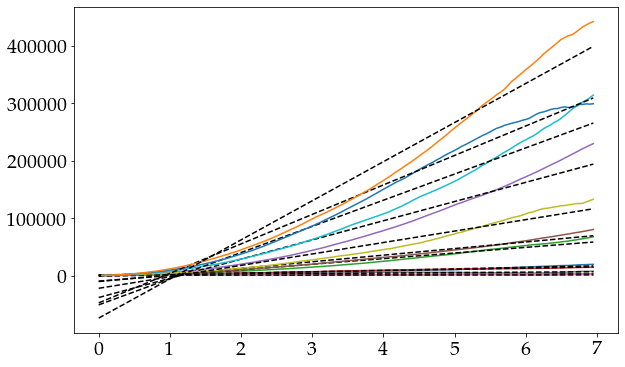

In [4]:
step=10
files=np.array([
    'SeedingSimulations/n_solid_molecules600_275_clust.npy',
    'SeedingSimulations/n_solid_molecules600_276_clust.npy',
    'SeedingSimulations/n_solid_molecules600_277_clust.npy',
    'SeedingSimulations/n_solid_molecules600_278_clust.npy',
    'SeedingSimulations/n_solid_molecules600_279_clust.npy',
    'SeedingSimulations/n_solid_molecules600_280_clust.npy',
    'SeedingSimulations/n_solid_molecules600_281_clust.npy',
    'SeedingSimulations/n_solid_molecules600_282_clust.npy',
    'SeedingSimulations/n_solid_molecules600_283_clust.npy',
    'SeedingSimulations/n_solid_molecules600_284_clust.npy',
    'SeedingSimulations/n_solid_molecules600_285_clust.npy',
    'SeedingSimulations/n_solid_molecules600_286_clust.npy'
])
ar_temps600=np.array([275,276,277,278,279,280,281,282,283,284,285,286])
ar600=np.zeros(files.shape[0])
def func(x,a,b):
    return a*x+b
Nmax=140
MSD = np.zeros(Nmax)
delta_time=step*10000*0.0000005 # Dump stride* time step in ns
for j in range(files.shape[0]):
    n_solid_molecules = np.load(files[j])
    #print(n_solid_molecules.shape)
    for i in range(Nmax):
        MSD[i]=np.mean(np.power(mydiff(n_solid_molecules,i),2))
    time=delta_time*np.linspace(0,Nmax-1,Nmax)
    popt, pcov = curve_fit(func, time[1:],MSD[1:])
    print('{0:1.4e}'.format(popt[0]*1.e+9/2))
    ar600[j]=popt[0]*1.e+9/2
    plt.plot(time[1:],MSD[1:])
    plt.plot(time,func(time,*popt),'--',color='black')
    #plt.xlim([0,0.5])
    #plt.ylim([0,1000])
plt.show()

### Attachment rate - cluster 200

4.9778e+10
6.0784e+10
1.0402e+11
1.4900e+12


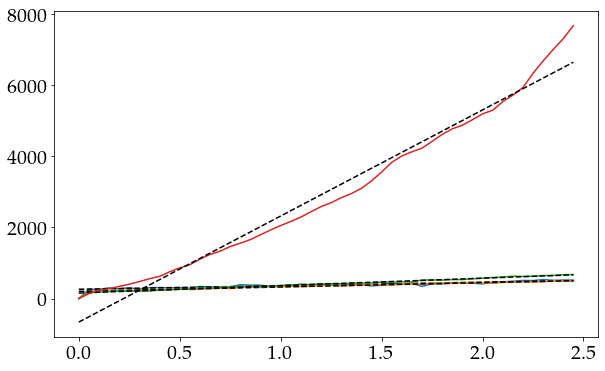

In [5]:
step=100
files=np.array([
 'SeedingSimulations/n_solid_molecules200_255_clust.npy',
 'SeedingSimulations/n_solid_molecules200_260_clust.npy',
 'SeedingSimulations/n_solid_molecules200_265_clust.npy',
 'SeedingSimulations/n_solid_molecules200_275_clust.npy'
])
ar_temps200=np.array([255,260,265,275])
ar200=np.zeros(files.shape[0])
def func(x,a,b):
    return a*x+b
Nmax=50
MSD = np.zeros(Nmax)
delta_time=1000*0.0000005 # Dump stride* time step in ns
for j in range(files.shape[0]):
    n_solid_molecules = np.load(files[j])
    for i in range(Nmax):
        MSD[i]=np.mean(np.power(mydiff(n_solid_molecules,i),2))
    time=step*delta_time*np.linspace(0,Nmax-1,Nmax)
    popt, pcov = curve_fit(func, time[1:],MSD[1:])
    print('{0:1.4e}'.format(popt[0]*1.e+9/2))
    ar200[j]=popt[0]*1.e+9/2
    plt.plot(time,MSD)
    plt.plot(time,func(time,*popt),'--',color='black')
    #plt.xlim([0,0.5])
    #plt.ylim([0,1000])
plt.show()

### Attachment rate - cluster 5000

1.6400e+13
2.4307e+12
1.7944e+13
3.5152e+13
1.7839e+13


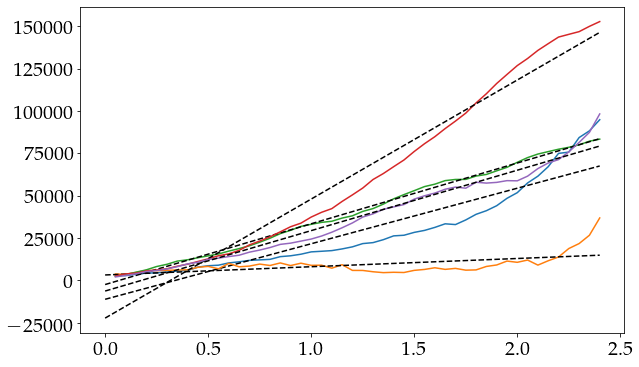

In [6]:
step=10
files=np.array([
 'SeedingSimulations/n_solid_molecules5000_292_clust.npy',
 'SeedingSimulations/n_solid_molecules5000_293_clust.npy',
 'SeedingSimulations/n_solid_molecules5000_294_clust.npy',
 'SeedingSimulations/n_solid_molecules5000_295_clust.npy',
 'SeedingSimulations/n_solid_molecules5000_296_clust.npy'
])
ar_temps5000=np.array([292,293,294,295,296])
ar5000=np.zeros(files.shape[0])
def func(x,a,b):
    return a*x+b
Nmax=49
MSD = np.zeros(Nmax)
delta_time=step*10000*0.0000005 # Dump stride* time step in ns
for j in range(files.shape[0]):
    n_solid_molecules = np.load(files[j])
    for i in range(Nmax):
        MSD[i]=np.mean(np.power(mydiff(n_solid_molecules,i),2))
    time=delta_time*np.linspace(0,Nmax-1,Nmax)
    popt, pcov = curve_fit(func, time[1:],MSD[1:])
    print('{0:1.4e}'.format(popt[0]*1.e+9/2))
    ar5000[j]=popt[0]*1.e+9/2
    plt.plot(time[1:],MSD[1:])
    plt.plot(time,func(time,*popt),'--',color='black')
plt.show()

[  0.16110507 -16.70560236]


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


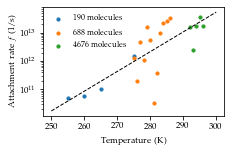

In [7]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif', 
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.25, 2)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
nc=np.array([190,688,4680.0])
plt.scatter(ar_temps200,ar200,s=10,label="190 molecules")
plt.scatter(ar_temps600,ar600,s=10,label="688 molecules")
plt.scatter(ar_temps5000,ar5000,s=10,label="4676 molecules")

x=np.linspace(250,300,100)

def log_theoretical_attachment_rate(temp,a,b):
    return a*temp+b

def theoretical_attachment_rate(temp,a,b):
    return np.exp(a*temp+b)

popt_tar, pcov_tar = curve_fit(log_theoretical_attachment_rate,np.concatenate((ar_temps200,ar_temps600,ar_temps5000)),np.log(np.concatenate((ar200,ar600,ar5000))),p0=(0.23460006,-36.23339537))
print(popt_tar)

plt.plot(x,theoretical_attachment_rate(x,*popt_tar),'--',color='black',linewidth=1)

plt.xlabel("Temperature (K)")
plt.ylabel(r"Attachment rate $f$ (1/s)")
plt.yscale('log')
plt.legend(frameon=False,fontsize=8)

#plt.savefig("attachment_rate.png",dpi=300,bbox_inches='tight')  # publication quality

plt.show()

## Supersaturation

In [8]:
deltamu_scan_ml_temperature = np.genfromtxt("SCAN-ML-Properties/deltamu_scan_ml_temperatures.txt")
deltamu_scan_ml = np.genfromtxt("SCAN-ML-Properties/deltamu_scan_ml.txt")
deltamu_scan_ml_error = np.genfromtxt("SCAN-ML-Properties/deltamu_scan_ml_error.txt")

In [9]:
deltaGinterp = interp1d(deltamu_scan_ml_temperature, deltamu_scan_ml, kind='cubic',fill_value="extrapolate")
deltaGerrorinterp = interp1d(deltamu_scan_ml_temperature, deltamu_scan_ml_error, kind='cubic',fill_value="extrapolate")
deltaG_der_interp = interp1d(deltamu_scan_ml_temperature, np.gradient(deltamu_scan_ml,deltamu_scan_ml_temperature), kind='cubic',fill_value="extrapolate")

## Density

In [10]:
density_temperature = np.loadtxt('SCAN-ML-Properties/density_temperature.txt',delimiter=",")
densityice = np.loadtxt('SCAN-ML-Properties/density_ice.txt',delimiter=",")
densityicemin = np.loadtxt('SCAN-ML-Properties/density_ice_min.txt',delimiter=",")
densityicemax = np.loadtxt('SCAN-ML-Properties/density_ice_max.txt',delimiter=",")
densityiceerror=(densityicemax-densityicemin)/2
densityliquid = np.loadtxt('SCAN-ML-Properties/density_liquid.txt',delimiter=",")
densityliquidmin = np.loadtxt('SCAN-ML-Properties/density_liquid_min.txt',delimiter=",")
densityliquidmax = np.loadtxt('SCAN-ML-Properties/density_liquid_max.txt',delimiter=",")
densityliquiderror=(densityliquidmax-densityliquidmin)/2

In [11]:
densityiceinterp = interp1d(density_temperature, densityice, kind='cubic',fill_value="extrapolate")
densityliquidinterp = interp1d(density_temperature, densityliquid, kind='cubic',fill_value="extrapolate")
densityiceerrorinterp = interp1d(density_temperature, densityiceerror, kind='cubic',fill_value="extrapolate")
densityliquiderrorinterp = interp1d(density_temperature, densityliquiderror, kind='cubic',fill_value="extrapolate")
densityice_der_interp = interp1d(density_temperature, np.gradient(densityice,density_temperature), kind='cubic',fill_value="extrapolate")
densityliquid_der_interp = interp1d(density_temperature, np.gradient(densityliquid,density_temperature), kind='cubic',fill_value="extrapolate")

## Rates and interfacial free energy from seeding results

In [12]:
temps=np.array([262.5,282,294.5])
nc=np.array([190,688,4680])
deltaT=np.array([3.5,2,1])
deltamu=-deltaGinterp(temps)
deltamu_der=-deltaG_der_interp(temps)
deltamuerror=deltaGerrorinterp(temps)
factor=18.01528/(6.02*100) # This takes the density to molecules per nm^3
rhoice=densityiceinterp(temps)/factor
rhoice_der=densityice_der_interp(temps)/factor
rholiquid=densityliquidinterp(temps)/factor
rholiquid_der=densityliquid_der_interp(temps)/factor
rhoiceerror=densityiceerrorinterp(temps)/factor
rholiquiderror=densityliquiderrorinterp(temps)/factor
beta=1./(0.008314463*temps)
frequencyattach=theoretical_attachment_rate(temps,*popt_tar)

In [13]:
surfacefreeenergy=np.power(3*nc*rhoice*rhoice*deltamu*deltamu*deltamu/(32*np.pi),1/3)*10/6.02
surfacefreeenergyerror=surfacefreeenergy*np.sqrt( np.power( deltamuerror/deltamu ,2) + np.power( (2*rhoiceerror)/(3*rhoice) ,2) + np.power( (2*rhoice_der*deltaT)/(3*rhoice) + deltamu_der*deltaT/deltamu,2))
barrier=0.5*deltamu*nc
zeldovich=np.sqrt(deltamu*beta/(6*np.pi*nc))
rates=rholiquid*1.E+27*zeldovich*frequencyattach*np.exp(-beta*barrier)
rateserror1=np.power( ( 1/(2*deltamu) - nc*beta/2                )*deltamuerror,2)
rateserror2=np.power( (-1/(2*temps)   + nc*beta*deltamu/(2*temps) + deltamu_der/(2*deltamu) - nc*beta*deltamu_der/2 + rholiquid_der/rholiquid)*deltaT      ,2)
rateserror3=np.power( rholiquiderror/rholiquid     ,2)
rateserror4=10.0
rateserror=rates*np.sqrt(rateserror1+rateserror2+rateserror3+rateserror4)

In [14]:
print(surfacefreeenergy)
print(beta*barrier)
print(zeldovich)
print(rholiquid*1.e+27)
print(frequencyattach)
print(rholiquid*1.e+27*frequencyattach*zeldovich)
print(np.exp(-beta*barrier))
print(np.log10(rates))
print(np.log10(np.e)*rateserror/rates) # error in log10(J)

[26.40660801 28.91635665 34.20668834]
[ 38.48819509  92.74404348 377.75623273]
[0.01063591 0.00455952 0.00135277]
[3.20197950e+28 3.24734812e+28 3.29926090e+28]
[1.29180799e+11 2.98920234e+12 2.23946023e+13]
[4.39937641e+37 4.42591605e+38 9.99503728e+38]
[1.92658978e-017 5.26955192e-041 8.76097863e-165]
[  20.92818037   -1.63222314 -125.05766296]
[ 1.70923344  3.3987723  14.50758686]


In [15]:
# Data from
deltatemps_tip4pice=np.array([14.5, 19.5, 34.5])
nc_tip4pice=np.array([ 7926,3167,600])
deltatemps_tip4p2005=np.array([14.5, 19.5, 29.5])
nc_tip4p2005=np.array([ 7931,3170,600])
deltatemps_mW=np.array([14.6, 19.6, 34.6])
nc_mW=np.array([7926,3167,600])

## Interfacial free energy

In [16]:
# Experiments
# From:
# DOI: 10.1039/C4CP04184D (Perspective) Phys. Chem. Chem. Phys., 2015, 17, 5514-5537
# Classical nucleation theory of homogeneous freezing of water: thermodynamic and kinetic parameters
# Luisa Ickes, André Welti, Corinna Hoose and Ulrike Lohmann

gamma_exp=np.array([33.04597701149425, 31.781609195402297, 43.9655172413793, 41.03448275862068, 25, 29.137931034482754, 31.724137931034477, 32.06896551724138])
print(np.mean(gamma_exp))
print(np.mean([33.04597701149425, 31.781609195402297, 29.137931034482754, 31.724137931034477, 32.06896551724138]))

33.46982758620689
31.551724137931036


In [17]:
def gamma_vs_T(temp,gamma0,gamma_slope):
    #gamma_slope2=0
    return (gamma0+gamma_slope*temp)

def gamma_vs_T_error(temp,gamma0error,gamma_slope_error):
    return np.sqrt(np.power(gamma0error,2)+np.power(temp*gamma_slope_error,2))


[4.5 3.  2. ]
[-35.32651515   0.22976097]


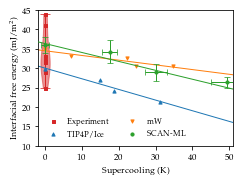

In [37]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif', 
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5, 2.5)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

markersize=10
mylinewidth=1.

#######################################
# Experiments
#######################################

plt.scatter(np.zeros(gamma_exp.shape[0]),gamma_exp,s=9,color=colors[3],marker='s',label="Experiment",zorder=0)
yerrs=np.array([[np.mean(gamma_exp)-np.amin(gamma_exp)],[np.amax(gamma_exp)-np.mean(gamma_exp)]])
plt.errorbar([0],[np.mean(gamma_exp)],yerr=yerrs,color=colors[3],capsize=5,capthick=0.75,linewidth=1,zorder=0)

parts = plt.violinplot(
        gamma_exp,positions=[0], widths=2.5, showmeans=False, showmedians=False,
        showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor(colors[3])
    pc.set_edgecolor(colors[3])
    pc.set_alpha(0.5)
    
#######################################
# TIP4P/Ice and mW
#######################################

gamma_tip4pice = np.array([29.8,26.9,24.2,21.4])
gamma_temp_tip4pice = 270-np.array([270,255,251.25,238.75])
plt.scatter(gamma_temp_tip4pice,gamma_tip4pice,color=colors[0],s=markersize,marker='^',label='TIP4P/Ice',zorder=1)
popt_gamma_tip4pice, pcov_gamma_tip4pice = curve_fit(gamma_vs_T, gamma_temp_tip4pice,gamma_tip4pice)
x=np.linspace(-10,60,100)
plt.plot(x,gamma_vs_T(x,*popt_gamma_tip4pice),color=colors[0],zorder=1,linewidth=mylinewidth)

gamma_mW = np.array([34.9,33.042394014962596,32.705735660847886,30.685785536159607,30.46134663341646])
gamma_temp_mW = np.array([0,7.13466877468638,22.10003314154701,24.61553088955172,34.63601345220825])
plt.scatter(gamma_temp_mW,gamma_mW,color=colors[1],s=markersize,marker='v',label='mW',zorder=2)
popt_gamma_mW, pcov_gamma_mW = curve_fit(gamma_vs_T, gamma_temp_mW,gamma_mW)
x=np.linspace(-10,60,100)
plt.plot(x,gamma_vs_T(x,*popt_gamma_mW),color=colors[1],zorder=2,linewidth=mylinewidth)

# SCAN-ML
meltingT=312
print(deltaT+1)
plt.errorbar(meltingT-np.insert(temps,0,meltingT),np.insert(surfacefreeenergy,0,36),yerr=np.insert(surfacefreeenergyerror,0,2),xerr=np.insert(deltaT+1,0,1),color=colors[2],capsize=3, ls='none',capthick=0.75,linewidth=1,zorder=3)
plt.scatter(meltingT-np.insert(temps,0,meltingT),np.insert(surfacefreeenergy,0,36),s=markersize,color=colors[2],label='SCAN-ML',zorder=3)

x=np.linspace(250,320,100)

# Not fitting to point at high supercooling because of larger error
popt_gamma, pcov_gamma = curve_fit(gamma_vs_T, np.insert(temps[1:],0,meltingT),np.insert(surfacefreeenergy[1:],0,36),sigma=np.insert(surfacefreeenergyerror[1:],0,2),absolute_sigma=True)
print(popt_gamma)
plt.plot(meltingT-x,gamma_vs_T(x,*popt_gamma),color=colors[2],zorder=3,linewidth=mylinewidth)

plt.xlim([-2,51])
plt.ylim([10,45])
plt.xlabel("Supercooling (K)")
plt.ylabel("Interfacial free energy (mJ/m$^2$)")
plt.legend(fontsize=8,frameon=False,ncol=2,loc='lower left')

#plt.savefig("interfacial_free_energy.png",dpi=300,bbox_inches='tight')  # publication quality

plt.show()

[4.5 3.  2. ]
[3.85488317e-07 4.58180400e-07 4.26497713e-07 4.08395094e-07] [ 0.  49.5 30.  17.5] [1.38775794e-05 1.20989902e-05 1.23327600e-05 1.39698437e-05]
[-1.19319603e-06  4.87923736e-08]


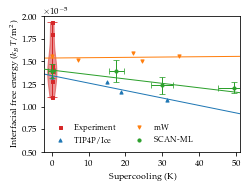

In [38]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif', 
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5, 2.5)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

markersize=10
mylinewidth=1.


#######################################
# Experiments
#######################################

meltingTexp=273.15
beta=1/(0.008314462618*1.0e6*meltingTexp) # The 1.0e6 takes kJ to mJ
plt.scatter(np.zeros(gamma_exp.shape[0]),beta*gamma_exp,s=9,color=colors[3],marker='s',label="Experiment",zorder=0)
yerrs=beta*np.array([[np.mean(gamma_exp)-np.amin(gamma_exp)],[np.amax(gamma_exp)-np.mean(gamma_exp)]])
plt.errorbar([0],[np.mean(beta*gamma_exp)],yerr=yerrs,color=colors[3],capsize=5,capthick=0.75,linewidth=1,zorder=0)

parts = plt.violinplot(
        beta*gamma_exp,positions=[0], widths=2.5, showmeans=False, showmedians=False,
        showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor(colors[3])
    pc.set_edgecolor(colors[3])
    pc.set_alpha(0.5)
    
#######################################
# TIP4P/Ice and mW
#######################################

beta=1/(0.008314462618*1.0e6*np.array([270,255,251.25,238.75]))
gamma_tip4pice = beta*np.array([29.8,26.9,24.2,21.4])
gamma_temp_tip4pice = 270-np.array([270,255,251.25,238.75])
plt.scatter(gamma_temp_tip4pice,gamma_tip4pice,color=colors[0],s=markersize,marker='^',label='TIP4P/Ice',zorder=1)
popt_gamma_tip4pice_kT, pcov_gamma_tip4pice_kT = curve_fit(gamma_vs_T, gamma_temp_tip4pice,gamma_tip4pice)
x=np.linspace(-10,60,100)
plt.plot(x,gamma_vs_T(x,*popt_gamma_tip4pice_kT),color=colors[0],zorder=1,linewidth=mylinewidth)

gamma_temp_mW = np.array([0,7.13466877468638,22.10003314154701,24.61553088955172,34.63601345220825])
beta=1/(0.008314462618*1.0e6*(270-gamma_temp_mW))
gamma_mW = beta*np.array([34.9,33.042394014962596,32.705735660847886,30.685785536159607,30.46134663341646])
plt.scatter(gamma_temp_mW,gamma_mW,color=colors[1],s=markersize,marker='v',label='mW',zorder=2)
popt_gamma_mW_kT, pcov_gamma_mW_kT = curve_fit(gamma_vs_T, gamma_temp_mW,gamma_mW)
x=np.linspace(-10,60,100)
plt.plot(x,gamma_vs_T(x,*popt_gamma_mW_kT),color=colors[1],zorder=2,linewidth=mylinewidth)

# SCAN-ML
meltingT=312
print(deltaT+1)
beta=1/(0.008314462618*1.0e6*np.insert(temps,0,meltingT))
print(beta,meltingT-np.insert(temps,0,meltingT),beta*np.insert(surfacefreeenergy,0,36))
plt.errorbar(meltingT-np.insert(temps,0,meltingT),beta*np.insert(surfacefreeenergy,0,36),yerr=beta*np.insert(surfacefreeenergyerror,0,2),xerr=np.insert(deltaT+1,0,1),color=colors[2],capsize=3, ls='none',capthick=0.75,linewidth=1,zorder=3)
plt.scatter(meltingT-np.insert(temps,0,meltingT),beta*np.insert(surfacefreeenergy,0,36),s=markersize,color=colors[2],label='SCAN-ML',zorder=3)

x=np.linspace(250,320,100)

# Not fitting to point at high supercooling because of larger error
beta=1/(0.008314462618*1.0e6*np.insert(temps[1:],0,meltingT))
popt_gamma_kT, pcov_gamma_kT = curve_fit(gamma_vs_T, np.insert(temps[1:],0,meltingT),beta*np.insert(surfacefreeenergy[1:],0,36),sigma=np.insert(surfacefreeenergyerror[1:],0,2),absolute_sigma=True)
print(popt_gamma_kT)
plt.plot(meltingT-x,gamma_vs_T(x,*popt_gamma_kT),color=colors[2],zorder=3,linewidth=mylinewidth)

plt.xlim([-2,51])
plt.ylim([0.5e-5,2.0e-5])
plt.xlabel("Supercooling (K)")
plt.ylabel("Interfacial free energy ($k_B T$/m$^2$)")
plt.legend(fontsize=8,frameon=False,ncol=2,loc='lower left')

#plt.savefig("interfacial_free_energy_kT.png",dpi=300,bbox_inches='tight')  # publication quality

plt.show()

## Turnbull-Laird correlation

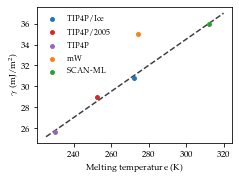

In [20]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif', 
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5, 2.5)

mymarkersize=15
#plt.title("Coexistence")
#TIP4P/ICE 272 0.906 1.29 30.8
plt.scatter([272],[30.8],s=mymarkersize,label="TIP4P/Ice",color=colors[0])
#TIP4P/2005 252 0.921 1.16 29.0
plt.scatter([252],[29.0],s=mymarkersize,label="TIP4P/2005",color=colors[3])
#TIP4P 230 0.94 1.05 25.6
plt.scatter([230],[25.6],s=mymarkersize,label="TIP4P",color=colors[4])
#mW 274.6 0.978 1.26 29.6
plt.scatter([274],[35],s=mymarkersize,label="mW",color=colors[1])
#Experiment 273.15 0.917 1.44 29.0
#plt.scatter([273],[31.5],label="Experiment")
# NNP SCAN
plt.scatter([312],[36],s=mymarkersize,label="SCAN-ML",color=colors[2])

def linear(x,a,b):
    return a*x+b
popt, pcov = curve_fit(func, [272,252,230,312],[30.8,29.0,25.6,36])

x=np.linspace(225,320,100)
plt.plot(x,func(x,*popt),'--',color="black",alpha=0.75,zorder=0)

plt.legend(frameon=False,fontsize=8)
plt.xlabel("Melting temperature (K)")
plt.ylabel("$\gamma$ (mJ/m$^2$)")

#plt.savefig("turnbull_laird.png",dpi=300,bbox_inches='tight')  # publication quality

plt.show()


## Cluster size vs supercooling

[ 8.06620644e+01 -8.72957881e+04]


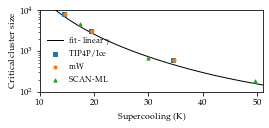

In [39]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif', 
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (4, 1.5)

plt.scatter(deltatemps_tip4pice,nc_tip4pice,label="TIP4P/Ice",s=10,marker='s')
#plt.scatter(deltatemps_tip4p2005,nc_tip4p2005,label="TIP4P/2005",s=100,marker='o')
plt.scatter(deltatemps_mW,nc_mW,label="mW",s=10,marker='o')
plt.scatter(312-temps,nc,label="SCAN-ML",s=10,marker='^')

#deltaGinterp = interp1d(312-temperature, deltaG, kind='cubic',fill_value="extrapolate")

def funcnc(temp,gamma0,gamma_slope):
    factor=18.01528/(6.02*100)
    rhos=densityiceinterp(temp)/factor
    gamma=gamma_vs_T(temp,gamma0,gamma_slope)/(10/6.02)
    return 32*np.pi*np.power(gamma,3)/(3*rhos*rhos*np.power(np.abs(deltaGinterp(temp)),3))
    
#popt_nc, pcov_nc = curve_fit(funcnc, temps,nc)
#
deltats=np.linspace(0,52,100)

plt.plot(deltats,funcnc(312-deltats,*popt_gamma),color='black',label=r'fit - linear $\gamma$',linewidth=1,zorder=0)
print(popt*10/6.02)

plt.yscale('log')
plt.ylim([100,10000])
plt.xlim([10,51])
plt.xlabel("Supercooling (K)")
plt.ylabel("Critical cluster size")
plt.legend(frameon=False,fontsize=8,loc="lower left")
#plt.savefig("cluster_size_vs_supercooling.png",dpi=300,bbox_inches='tight')  # publication quality
plt.show()

## Rates

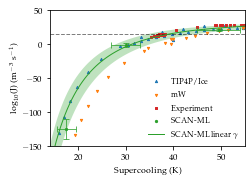

In [24]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif', 
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5, 2.5)

j_tip4pice=np.genfromtxt("SCAN-ML-Properties/j_tip4pice_large.txt")
j_tip4pice_other=np.genfromtxt("SCAN-ML-Properties/j_tip4pice_other.txt")
j_tip4pice_seeding_points=np.genfromtxt("SCAN-ML-Properties/j_tip4pice_seeding_points.txt")
j_mW=np.genfromtxt("SCAN-ML-Properties/j_mW_large.txt")
j_mW_other=np.genfromtxt("SCAN-ML-Properties/j_mW_other.txt")
j_mW_seeding_points=np.genfromtxt("SCAN-ML-Properties/j_mW_seeding_points.txt")

j_exper1=np.genfromtxt("ExperimentalProperties/j_hagen81.txt")
j_exper2=np.genfromtxt("ExperimentalProperties/j_manka12.txt")
j_exper3=np.genfromtxt("ExperimentalProperties/j_murray10.txt")
j_exper4=np.genfromtxt("ExperimentalProperties/j_riechers13.txt")
j_exper5=np.genfromtxt("ExperimentalProperties/j_stan09.txt")
j_exper6=np.genfromtxt("ExperimentalProperties/j_amaya18.txt")


def j_exp(deltaT):
    return -154.59 + 8.5035*deltaT-0.13304*np.power(deltaT,2)+0.00070129*np.power(deltaT,3)

def j_fit(deltaT,A,B):
    return A - np.abs(B)*np.power(deltaT,-2) #+D*np.power(deltaT,3)

def j_theory(deltaT):
    meltingT=312
    temp=meltingT-deltaT
    beta=1./(0.008314463*temp)
    factor=18.01528/(6.02*100)
    rholiquid=densityliquidinterp(temp)/factor
    deltamu=-deltaGinterp(temp)
    nc=funcnc(temp,*popt_gamma)
    zeldovich=np.sqrt(deltamu*beta/(6*np.pi*nc))
    frequencyattach=theoretical_attachment_rate(temp,*popt_tar)
    barrier=0.5*deltamu*nc
    return rholiquid*1.E+27*zeldovich*frequencyattach*np.exp(-beta*barrier)

def j_theory_error(deltaT):
    meltingT=312
    temp=meltingT-deltaT
    beta=1./(0.008314463*temp)
    factor=18.01528/(6.02*100)
    rholiquid=densityliquidinterp(temp)/factor  # This takes the density to molecules per nm^3
    deltamu=-deltaGinterp(temp)
    nc=funcnc(temp,*popt_gamma)
    zeldovich=np.sqrt(deltamu*beta/(6*np.pi*nc))
    frequencyattach=theoretical_attachment_rate(temp,*popt_tar)
    deltamu=-deltaGinterp(temp)
    deltamuerror=deltaGerrorinterp(temp)
    rhoice=densityiceinterp(temp)/factor
    gamma=(6.0221409/10)*gamma_vs_T(temp,*popt_gamma)
    gammaerror=(6.0221409/10)*2.5
    barrier=16*np.pi*np.power(gamma,3)/(3*np.power(rhoice*deltamu,2))
    errorJgamma=(beta*barrier*3/gamma)*gammaerror
    errorJdeltamu=(1/(2*deltamu)+beta*barrier*2/np.abs(deltamu))*deltamuerror
    J=rholiquid*1.E+27*zeldovich*frequencyattach*np.exp(-beta*barrier)
    return J*np.sqrt(np.power(errorJgamma,2)+np.power(errorJdeltamu,2))

markersize=5

# TIP4P/Ice mW
plt.scatter(j_tip4pice_other[:,0],j_tip4pice_other[:,1],s=markersize,marker='^',color=colors[0],label="TIP4P/Ice")
plt.scatter(j_tip4pice[::5,0],j_tip4pice[::5,1],s=markersize,marker='^',color=colors[0])
plt.scatter(j_mW_other[:,0],j_mW_other[:,1],s=markersize,marker='v',color=colors[1],label="mW")
plt.scatter(j_mW[::5,0],j_mW[::5,1],s=markersize,marker='v',color=colors[1])

# Experiments
plt.scatter(273.15-j_exper1[:,0],j_exper1[:,1]+6,s=markersize,marker='s',label="Experiment",color=colors[3])
plt.scatter(273.15-j_exper2[:,0],j_exper2[:,1]+6,s=markersize,marker='s',color=colors[3])
plt.scatter(273.15-j_exper3[:,0],j_exper3[:,1]+6,s=markersize,marker='s',color=colors[3])
plt.scatter(273.15-j_exper4[:,0],j_exper4[:,1]+6,s=markersize,marker='s',color=colors[3])
plt.scatter(-1*j_exper5[:,0],j_exper5[:,1]+6,s=markersize,marker='s',color=colors[3])
plt.scatter(273.15-j_exper6[:,0],j_exper6[:,1]+6,s=markersize,marker='s',color=colors[3])

# SCAN-ML
popt, pcov = curve_fit(j_fit, 312-temps,np.log10(rates),p0=[-154.59,-0.13304])
x=np.linspace(14,60,100)
plt.plot(x,np.log10(j_theory(x)),color=colors[2],linewidth=1,zorder=5,label="SCAN-ML linear $\gamma$") #,label="CNT")
plt.fill_between(x,np.log10(j_theory(x))-np.log10(np.e)*j_theory_error(x)/j_theory(x),np.log10(j_theory(x))+np.log10(np.e)*j_theory_error(x)/j_theory(x),color=colors[2],linewidth=0,alpha=0.3,zorder=0)
plt.scatter(312-temps,np.log10(rates),s=markersize,color=colors[2],label="SCAN-ML")
plt.errorbar(312-temps,np.log10(rates),yerr=np.log10(np.e)*rateserror/rates,xerr=deltaT+1,color=colors[2],capsize=3, ls='none',elinewidth=0.75,markeredgewidth=0.75)



plt.plot([14,60],[14,14],'--',color='black',alpha=0.5,linewidth=1)
plt.xlim([14,55])
plt.ylim([-150,50])
plt.xlabel("Supercooling (K)")
plt.ylabel(r'log$_{10}$(J) (m$^{-3}$ s$^{-1}$)')
plt.savefig("plotJ.png",dpi=150,bbox_inches='tight')  # publication quality

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,3,4,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],frameon=False,fontsize=8)

#plt.savefig("rates.png",dpi=300,bbox_inches='tight')  # publication quality
plt.show()

## Analysis of $\Delta\mu$ and $\gamma$ 

In [25]:
df_tip4pice=np.genfromtxt('SCAN-ML-Properties/deltamu_tip4p.txt')
df_mW=np.genfromtxt('SCAN-ML-Properties/deltamu_mW.txt')

In [26]:
deltamu = np.genfromtxt("ExperimentalProperties/deltamu.txt")
deltamu_temperatures = np.genfromtxt("ExperimentalProperties/deltamu_temperatures.txt")
deltamu_error = np.genfromtxt("ExperimentalProperties/deltamu_error.txt")

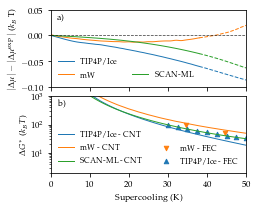

In [48]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif', 
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5, 3.)

fig, axs = plt.subplots(2,sharex=True)


mylinewidth=1

# Chemical potential
# Show difference with respect to experimental value
# Interpolate
kb=0.008314462618
beta=1./(kb*deltamu_temperatures)    
chem_pot_exp_interp = interp1d(-deltamu_temperatures+273.15, beta*deltamu, kind='cubic',fill_value="extrapolate")
beta=1./(kb*deltamu_scan_ml_temperature) 
chem_pot_scan_interp = interp1d(312-deltamu_scan_ml_temperature, beta*deltamu_scan_ml, kind='cubic',fill_value="extrapolate")
beta=1./(kb*(-df_tip4pice[:,0]+270))   
chem_pot_tip4pice_interp = interp1d(df_tip4pice[:,0],beta*df_tip4pice[:,1]*4.184, kind='cubic',fill_value="extrapolate")
beta=1./(kb*(-df_mW[:,0]+274.6))   
chem_pot_mW_interp = interp1d(df_mW[:,0],beta*df_mW[:,1]*4.184, kind='cubic',fill_value="extrapolate")


x=np.linspace(0,38,100)
diff_mu=np.abs(chem_pot_tip4pice_interp(x))-np.abs(chem_pot_exp_interp(x))
axs[0].plot(x,diff_mu,label="TIP4P/Ice",linewidth=mylinewidth,color=colors[0])
diff_mu=np.abs(chem_pot_mW_interp(x))-np.abs(chem_pot_exp_interp(x))
axs[0].plot(x,diff_mu,label="mW",linewidth=mylinewidth,color=colors[1])
axs[0].plot([0],[0],color='white',label=" ")
diff_mu=np.abs(chem_pot_scan_interp(x))-np.abs(chem_pot_exp_interp(x))
axs[0].plot(x,diff_mu,label="SCAN-ML",linewidth=mylinewidth,color=colors[2])
x=np.linspace(38,50,100)
axs[0].plot(x,np.abs(chem_pot_tip4pice_interp(x))-np.abs(chem_pot_exp_interp(x)),'--',linewidth=mylinewidth,color=colors[0])
axs[0].plot(x,np.abs(chem_pot_mW_interp(x))-np.abs(chem_pot_exp_interp(x)),'--',linewidth=mylinewidth,color=colors[1])
axs[0].plot(x,np.abs(chem_pot_scan_interp(x))-np.abs(chem_pot_exp_interp(x)),'--',linewidth=mylinewidth,color=colors[2])
axs[0].plot([0,50],[0.,0.],'--',color='black',alpha=0.75,linewidth=0.75)

axs[0].set_ylabel(r"$|\Delta \mu|-|\Delta \mu^{\mathrm{exp}}|$ ($k_B$ T)")

axs[0].set_xlim([0,50])
axs[0].legend(fontsize=8,frameon=False,ncol=2)
axs[0].set_ylim([-0.1,0.05])

# Barrier

def gamma_vs_T(temp,gamma0,gamma_slope):
    #gamma_slope2=0
    return (gamma0+gamma_slope*temp)

kb=0.008314462618
chem_pot_exp_interp = interp1d(-deltamu_temperatures+273.15, deltamu, kind='cubic',fill_value="extrapolate")
chem_pot_scan_interp = interp1d(312-deltamu_scan_ml_temperature, deltamu_scan_ml, kind='cubic',fill_value="extrapolate")
chem_pot_tip4pice_interp = interp1d(df_tip4pice[:,0],df_tip4pice[:,1]*4.184, kind='cubic',fill_value="extrapolate")
chem_pot_mW_interp = interp1d(df_mW[:,0],df_mW[:,1]*4.184, kind='cubic',fill_value="extrapolate")
# TIP4P/Ice and mW
#kb=0.008314462618*1e6 # from kJ to mJ 
#gamma_tip4pice = np.array([29.8,26.9,24.2,21.4])
#gamma_temp_tip4pice = 270-np.array([270,255,251.25,238.75])
#popt_gamma_tip4pice, pcov_gamma_tip4pice = curve_fit(gamma_vs_T, gamma_temp_tip4pice,gamma_tip4pice)
#gamma_mW = np.array([34.9,33.042394014962596,32.705735660847886,30.685785536159607,30.46134663341646])
#gamma_temp_mW = np.array([0,7.13466877468638,22.10003314154701,24.61553088955172,34.63601345220825])
#popt_gamma_mW, pcov_gamma_mW = curve_fit(gamma_vs_T, gamma_temp_mW,gamma_mW)
# SCAN-ML
#meltingT=312
#popt_gamma, pcov_gamma = curve_fit(gamma_vs_T, meltingT-np.insert(temps,0,meltingT),np.insert(surfacefreeenergy,0,36),sigma=np.insert(surfacefreeenergyerror,0,2),absolute_sigma=True)
#popt_gamma, pcov_gamma = curve_fit(gamma_vs_T, np.insert(temps[1:],0,meltingT),np.insert(surfacefreeenergy[1:],0,36),sigma=np.insert(surfacefreeenergyerror[1:],0,2),absolute_sigma=True)

factor=18.01528/(6.02*100) # This takes the density to molecules per nm^3
factor2=np.power(6.02,3)*1e-3*16*np.pi/3

kb=0.008314462618
x=np.linspace(10,50,100)
rhoice2=(0.909+x*(0.919-0.909)/100)/factor
barrier_tip4pice=factor2*np.power(gamma_vs_T(x,*popt_gamma_tip4pice),3)/np.power(chem_pot_tip4pice_interp(x)*rhoice2,2)
beta=1./(kb*(270-x)) 
axs[1].plot(x,beta*barrier_tip4pice,label="TIP4P/Ice - CNT",linewidth=mylinewidth)

rhoice2=(0.978+x*(0.987-0.978)/100)/factor
barrier_mW=factor2*np.power(gamma_vs_T(x,*popt_gamma_mW),3)/np.power(chem_pot_mW_interp(x)*rhoice2,2)
beta=1./(kb*(274.6-x)) 
axs[1].plot(x,beta*barrier_mW,label="mW - CNT",linewidth=mylinewidth)

rhoice2=densityiceinterp(meltingT-x)/factor
barrier_scan=factor2*np.power(gamma_vs_T(meltingT-x,*popt_gamma),3)/np.power(chem_pot_scan_interp(x)*rhoice2,2)
beta=1./(kb*(meltingT-x)) 
axs[1].plot(x,beta*barrier_scan,label="SCAN-ML - CNT",linewidth=mylinewidth)

axs[1].scatter([-100],[0],color='white',label=" ")

# Add literature data
data_barrier_mW=np.genfromtxt("SCAN-ML-Properties/barrier_simulation_mW.txt")
meltingT_mW=274.6 # Value reported by Molinero and Moore
axs[1].scatter(meltingT_mW-data_barrier_mW[:,0],data_barrier_mW[:,1],s=20,marker='v',color=colors[1],label="mW - FEC")

data_barrier_TIP4PIce=np.genfromtxt("SCAN-ML-Properties/barrier_simulation_TIP4PIce.txt")
meltingT_TIP4PIce=270.0 # Value reported by Piaggi
axs[1].scatter(meltingT_TIP4PIce-data_barrier_TIP4PIce[:,0],data_barrier_TIP4PIce[:,1],s=20,marker='^',color=colors[0],label="TIP4P/Ice - FEC")

axs[1].set_yscale('log')
axs[1].set_ylim([2,1000])
axs[1].set_xlabel("Supercooling (K)")
#axs[1].set_ylabel(r"$\gamma$ ($k_B T/a^2$)")
axs[1].set_ylabel(r"$\Delta G^*$ ($k_B T$)")
axs[1].legend(fontsize=8,frameon=False,ncol=2)

# Labels
axs[0].text(2.5,0.034,"a)",ha='center',va='center')
axs[1].text(2.5,550,"b)",ha='center',va='center')

plt.subplots_adjust(hspace=0.125)

#plt.savefig("analysis.png",dpi=300,bbox_inches='tight')  # publication quality

plt.show()

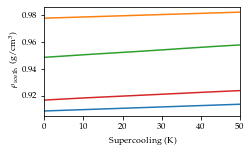

In [28]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif', 
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5, 2.)

experimentalIceDensity=np.genfromtxt("ExperimentalProperties/density_ice.txt")
meltingTexp=273.15
factor3=4*18.01528/(6.02*0.1)
densityiceinterp_exp = splrep(meltingTexp-experimentalIceDensity[:,0],factor3/experimentalIceDensity[:,1])

x=np.linspace(0,50,100)
rhoice2_exp=splev(x,densityiceinterp_exp)
# From J. Chem. Phys. 145, 211922 (2016); https://doi.org/10.1063/1.4965427
rhoice2=(0.909+x*(0.919-0.909)/100)
plt.plot(x,rhoice2,label="TIP4P/Ice")
# From Prestipino, J. Chem. Phys. 148, 124505 (2018); https://doi.org/10.1063/1.5016518
rhoice2=(0.978+x*(0.987-0.978)/100)
plt.plot(x,rhoice2,label="mW")
rhoice2=densityiceinterp(312-x)
plt.plot(x,rhoice2,label="SCAN-ML")

plt.plot(x,rhoice2_exp,label="Experiment")

plt.ylabel(r"$\rho_{\mathrm{ice\:Ih}}$ (g/cm$^3$)")
plt.xlabel("Supercooling (K)")
#plt.legend()
plt.xlim([0,50])

#plt.savefig("density_ice.png",dpi=300,bbox_inches='tight')  # publication quality

plt.show()

## Effect of stacking disorder

In [35]:
print(funcnc(290,*popt_gamma))

-633.2806058610956


In [55]:
cub2=np.linspace(0,1,1000)
#N=np.linspace(1,100000,1000)
temps_sf=np.linspace(250,320,1000)
deltamu_cub_hex=np.zeros(temps_sf.shape[0])
deltamu_cub_hex2=np.zeros(temps_sf.shape[0])

def deltaMuTheory(C,deltaMu,temps):
    N=funcnc(temps,*popt_gamma)
    factor=18.01528/(6.02*100)
    rhoice_sf=densityiceinterp(temps)/factor
    length_sf=(14.801/4)/10 # in nm
    Nl=np.power(6*N/(np.pi*rhoice_sf),1./3.)/length_sf
    return C*deltaMu + (Nl/N)*8.314463*temps*(C*np.log(C)+(1-C)*np.log(1-C))

for i in range(temps_sf.shape[0]):
    deltamu_cub_hex[i]=np.nanmin(deltaMuTheory(cub2,5,temps_sf[i]))
    deltamu_cub_hex2[i]=np.nanmin(deltaMuTheory(cub2,65,temps_sf[i]))
    
deltamu_cub_hex_interp = interp1d(temps_sf, deltamu_cub_hex, kind='cubic',fill_value="extrapolate")
deltamu_cub_hex2_interp = interp1d(temps_sf, deltamu_cub_hex2, kind='cubic',fill_value="extrapolate")

<ipython-input-55-d94b9eeec87a>:13: RuntimeWarning: divide by zero encountered in log
  return C*deltaMu + (Nl/N)*8.314463*temps*(C*np.log(C)+(1-C)*np.log(1-C))
<ipython-input-55-d94b9eeec87a>:13: RuntimeWarning: invalid value encountered in multiply
  return C*deltaMu + (Nl/N)*8.314463*temps*(C*np.log(C)+(1-C)*np.log(1-C))


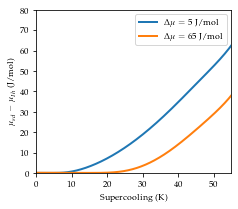

In [51]:
meltingT-312
plt.plot(meltingT-temps_sf,np.abs(deltamu_cub_hex_interp(temps_sf)),label="$\Delta\mu=5$ J/mol",linewidth=2)
plt.plot(meltingT-temps_sf,np.abs(deltamu_cub_hex2_interp(temps_sf)),label="$\Delta\mu=65$ J/mol",linewidth=2)

plt.xlim([0,55])
plt.ylim([0,80])
plt.xlabel("Supercooling (K)")
plt.ylabel("$\mu_{sd}-\mu_{Ih}$ (J/mol)")
plt.legend()
plt.show()

In [52]:
# Cubicity
cub2=np.linspace(0,1,50000)
N=np.linspace(1,200000,10000)
minC=np.zeros(N.shape[0])
minC2=np.zeros(N.shape[0])

print(densityiceinterp(270))

def Ncpl(numMol):
    # Number of closed pack layers
    factor=18.01528/(6.02*100)
    temp=270
    rhoice_sf=densityiceinterp(temp)/factor
    length_sf=(14.801/4)/10 # in nm
    return np.power(6*numMol/(np.pi*rhoice_sf),1./3.)/length_sf

def deltaMuTheory(C,deltaMu,numMol):
    #deltaMu=18.84
    #Ncpl=24
    temp=270
    myNcpl=Ncpl(numMol)
    return C*deltaMu + (myNcpl/numMol)*8.314463*temp*(C*np.log(C)+(1-C)*np.log(1-C))

for i in range(N.shape[0]):
    minC[i]=cub2[np.nanargmin(deltaMuTheory(cub2,5,N[i]))]
    minC2[i]=cub2[np.nanargmin(deltaMuTheory(cub2,65,N[i]))]

0.9567087281190452


<ipython-input-52-a30a4b8a58d7>:22: RuntimeWarning: divide by zero encountered in log
  return C*deltaMu + (myNcpl/numMol)*8.314463*temp*(C*np.log(C)+(1-C)*np.log(1-C))
<ipython-input-52-a30a4b8a58d7>:22: RuntimeWarning: invalid value encountered in multiply
  return C*deltaMu + (myNcpl/numMol)*8.314463*temp*(C*np.log(C)+(1-C)*np.log(1-C))


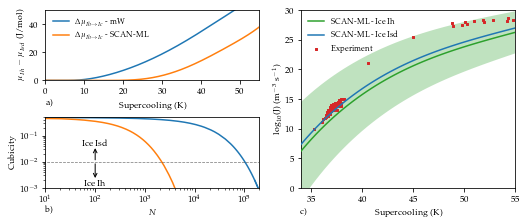

In [53]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif', 
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (7.2, 3)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

mylinewidth=1.5

# DeltaMu

meltingT-312
ax1.plot(meltingT-temps_sf,np.abs(deltamu_cub_hex_interp(temps_sf)),label=r'$\Delta\mu_{Ih\rightarrow Ic}$ - mW',linewidth=mylinewidth)
ax1.plot(meltingT-temps_sf,np.abs(deltamu_cub_hex2_interp(temps_sf)),label=r'$\Delta\mu_{Ih\rightarrow Ic}$ - SCAN-ML',linewidth=mylinewidth)

ax1.set_xlim([0,55])
ax1.set_ylim([0,50])
ax1.set_xlabel("Supercooling (K)")
ax1.set_ylabel("$\mu_{Ih}-\mu_{Isd}$ (J/mol)")
ax1.legend(frameon=False,fontsize=8)
ax1.text(1,-16,"a)",va='center',ha='center')


# Cubicity 

ax2.plot(N,minC,linewidth=mylinewidth)
ax2.plot(N,minC2,linewidth=mylinewidth)
ax2.plot([0,200000],[1.e-2,1.e-2],'--',color='black',alpha=0.5,linewidth=0.75)
ax2.text(100,1.5e-3,"Ice Ih",va='center',ha='center')
ax2.text(100,5.e-2,"Ice Isd",va='center',ha='center')
ax2.annotate("", xy=(100,2.e-3), xytext=(100,1.e-2),arrowprops=dict(arrowstyle="->"))
ax2.annotate("", xy=(100,4.e-2), xytext=(100,1.e-2),arrowprops=dict(arrowstyle="->"))
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim([1.e-3,0.5])
ax2.set_xlim([10,200000])
ax2.set_xlabel("$N$")
ax2.set_ylabel("Cubicity")
ax2.text(11,1.5e-4,"b)",va='center',ha='center')
# ax2.legend()
# Rates

def j_theory_corr(deltaT):
    meltingT=312
    temp=meltingT-deltaT
    beta=1./(0.008314463*temp)
    factor=18.01528/(6.02*100)
    rholiquid=densityliquidinterp(temp)/factor
    nc=funcnc(temp,*popt_gamma)
    deltamu=-deltaGinterp(temp)-np.abs(deltamu_cub_hex_interp(temp))/1000
    zeldovich=np.sqrt(deltamu*beta/(6*np.pi*nc))
    frequencyattach=theoretical_attachment_rate(temp,*popt_tar)
    barrier=0.5*deltamu*nc
    return rholiquid*1.E+27*zeldovich*frequencyattach*np.exp(-beta*barrier)

#plt.scatter(j_exper[:,0],j_exper[:,1],s=100,marker='s',label="Experiment",color=colors[3])
mymarkersize=5
ax3.scatter(273.15-j_exper1[:,0],j_exper1[:,1]+6,s=mymarkersize,marker='s',label="Experiment",color=colors[3])
ax3.scatter(273.15-j_exper2[:,0],j_exper2[:,1]+6,s=mymarkersize,marker='s',color=colors[3])
ax3.scatter(273.15-j_exper3[:,0],j_exper3[:,1]+6,s=mymarkersize,marker='s',color=colors[3])
ax3.scatter(273.15-j_exper4[:,0],j_exper4[:,1]+6,s=mymarkersize,marker='s',color=colors[3])
ax3.scatter(-1*j_exper5[:,0],j_exper5[:,1]+6,s=mymarkersize,marker='s',color=colors[3])
ax3.scatter(273.15-j_exper6[:,0],j_exper6[:,1]+6,s=mymarkersize,marker='s',color=colors[3])

def j_exp(deltaT):
    return -154.59 + 8.5035*deltaT-0.13304*np.power(deltaT,2)+0.00070129*np.power(deltaT,3)

def j_fit(deltaT,A,B,C,D):
    return A + B*deltaT+C*np.power(deltaT,2)+D*np.power(deltaT,3)

x=np.linspace(10,60,1000)

data_fit_supersat=np.concatenate((273.15-j_exper1[:,0],273.15-j_exper2[:,0],273.15-j_exper3[:,0],273.15-j_exper4[:,0],-1*j_exper5[:,0],273.15-j_exper6[:,0]))
data_fit_logrates=np.concatenate((j_exper1[:,1],j_exper2[:,1],j_exper3[:,1],j_exper4[:,1],j_exper5[:,1],j_exper6[:,1]))+6
popt, pcov = curve_fit(j_fit, data_fit_supersat,data_fit_logrates)


x=np.linspace(15,60,100)
ax3.plot(x,np.log10(j_theory(x)),color=colors[2],linewidth=mylinewidth,zorder=5,label="SCAN-ML - Ice Ih")
ax3.plot(x,np.log10(j_theory_corr(x)),color=colors[0],linewidth=mylinewidth,zorder=5,label="SCAN-ML - Ice Isd")
ax3.fill_between(x,np.log10(j_theory(x))-np.log10(np.e)*j_theory_error(x)/j_theory(x),np.log10(j_theory(x))+np.log10(np.e)*j_theory_error(x)/j_theory(x),color=colors[2],linewidth=0,alpha=0.3,zorder=0)

ax3.set_xlim([34,55])
ax3.set_ylim([0,30])
ax3.legend(frameon=False,fontsize=8) #,loc='lower center')
ax3.set_xlabel("Supercooling (K)")
ax3.set_ylabel(r'log$_{10}$(J) (m$^{-3}$ s$^{-1}$)')
ax3.text(34.25,-4,"c)",va='center',ha='center')

#plt.savefig("stacking_disorder.png",dpi=300,bbox_inches='tight')  # publication quality

plt.show()